<a href="https://colab.research.google.com/github/Eungyum/scikit-learn_study/blob/main/4_6_%EB%B3%80%EC%88%98_%EC%84%A0%ED%83%9D_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [ ]:
df_wine.columns = ['Class label','Alcohole','Mlic acid','Ash','Alcalinity of ash','Magnesium',
                  'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                  'Color intensity','Hue','0D280/0D315 of diluted wines','Proline']
X = df_wine.iloc[:,1:].values # 특성은 0을 제외한 모든 열
y = df_wine.iloc[:,0].values # 타겟은 0열

X_train, X_test, y_train, y_test =\
train_test_split(X, y,
                 test_size=0.3,
                 random_state=0,
                 stratify=y)

In [ ]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1] # np.argsort 오름차순으로 정렬한 결과의 인덱스를 반환
indices

array([12,  6,  9, 11,  0, 10,  5,  3,  4,  1,  8,  7,  2])

In [ ]:
X_train.shape

(123, 13)

In [ ]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.213565
 2) Flavanoids                     0.166822
 3) Color intensity                0.140178
 4) 0D280/0D315 of diluted wines   0.121524
 5) Alcohole                       0.109104
 6) Hue                            0.059554
 7) Total phenols                  0.050360
 8) Alcalinity of ash              0.032400
 9) Magnesium                      0.027268
10) Mlic acid                      0.025183
11) Proanthocyanins                0.024799
12) Nonflavanoid phenols           0.017587
13) Ash                            0.011656


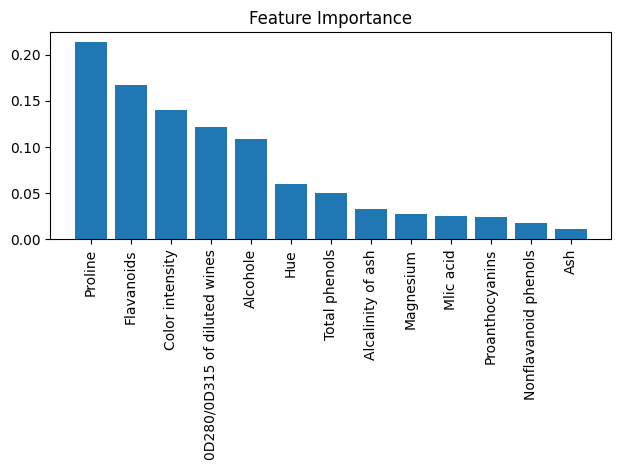

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()